In [2]:
!pip install numpy
!pip install scikit-learn
!pip install pandas
!pip install matplotlib
!pip install umap-learn[plot]
!pip install gensim
!pip install spellchecker
!pip install emoji


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 3.9/3.9 MB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for silpa_common: started
  Running setup.py install for silpa_common: finished with status 'done'
  Running setup.py install for soundex: started
  Running setup.py install for soundex: finished with status 'done'
  Running setup.py install for inexactsearch: started
  Running setup.py install for inexactsearch: finished with status 'done'
  Running setup.py install for spellchecker: started
  Running setup.py install for spellchecker: finished with status 'done'


  DEPRECATION: silpa_common is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  DEPRECATION: soundex is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  DEPRECATION: inexactsearch is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can 

     -------------------------------------- 358.9/358.9 kB 2.2 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Data Preproccesing

In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import auc


import re
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer


stemmer = WordNetLemmatizer()

# Load the Twitter sentiment dataset with tab delimiter and ISO-8859-1 encoding
data = pd.read_csv('twitter_sentiment_dataset.csv',  encoding='utf-8')

# Preprocess the data (cleaning, tokenization, etc.)

# Fill NaN values with empty strings
data['SentimentText'].fillna('', inplace=True)

# Preprocess the data
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'https?://\S+', 'URL', text)
    
    # Remove mentions and hashtags
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)

    # Remove non-word (special) characters such as punctuation, numbers etc
    text = re.sub(r'\W', ' ', str(text))

    # Remove digits or replace with 'NUM'
    text = re.sub(r'\d+', 'NUM', text)

    # Remove all single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    # Substitute multiple spaces with single space
    text = re.sub(r'\s+', ' ', text, flags=re.I) #re.I -> ignore case
    
    # # Handle emojis
    # text = emoji.demojize(text)
    
    # Tokenize the text using TweetTokenizer
    tokenizer = TweetTokenizer()
    tokens = tokenizer.tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [stemmer.lemmatize(word) for word in tokens if word not in stop_words]
    
    # Join the tokens back into a cleaned text
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

data['SentimentText'] = data['SentimentText'].apply(preprocess_text)

print("PREPROCESS DONE")

# Split the data into training, development, and test sets
train_data, temp_data = train_test_split(data, test_size=0.3, random_state=42)
dev_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Extract TF-IDF features from the text data
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train = tfidf_vectorizer.fit_transform(train_data['SentimentText'])
X_dev = tfidf_vectorizer.transform(dev_data['SentimentText'])
X_test = tfidf_vectorizer.transform(test_data['SentimentText'])

print("TFIDF DONE")

# Function to calculate average document length
def calculate_average_length(dataset):
    return dataset['SentimentText'].apply(lambda x: len(x.split())).mean()

# Calculate average document length for each set
average_length_train = calculate_average_length(train_data)
average_length_dev = calculate_average_length(dev_data)
average_length_test = calculate_average_length(test_data)

# Calculate number of documents in each set
num_train_documents = len(train_data)
num_dev_documents = len(dev_data)
num_test_documents = len(test_data)

# TF-IDF Vectorization and vocabulary size
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_vectorizer.fit_transform(train_data['SentimentText'])
vocabulary_size = len(tfidf_vectorizer.get_feature_names_out())

# Print the statistics
print(f"Average Document Length - Training Set: {average_length_train}")
print(f"Average Document Length - Development Set: {average_length_dev}")
print(f"Average Document Length - Test Set: {average_length_test}")
print(f"Number of Training Documents: {num_train_documents}")
print(f"Number of Development Documents: {num_dev_documents}")
print(f"Number of Test Documents: {num_test_documents}")
print(f"Vocabulary Size: {vocabulary_size}")

# # Feature Selection using Information Gain (SelectKBest)
# k_best = 15000 
# selector = SelectKBest(mutual_info_classif, k=k_best)

# # Fit and transform the training data
# X_train = selector.fit_transform(X_train, train_data['Sentiment'])
# X_dev = selector.transform(X_dev)
# X_test = selector.transform(X_test)

# print("IG DONE")

# # Perform dimensionality reduction using Truncated SVD
# n_components = 5000 
# svd = TruncatedSVD(n_components=n_components, random_state=42)
# X_train = svd.fit_transform(X_train)
# X_dev = svd.transform(X_dev)
# X_test = svd.transform(X_test)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ΑΝΑΣΤΑΣΙΟΣ\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\ΑΝΑΣΤΑΣΙΟΣ\AppData\Local\Temp\ipykernel_14236\338963724.py:22: DtypeWarning: Columns (10,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('twitter_sentiment_dataset.csv',  encoding='utf-8')


PREPROCESS DONE
Train size:  69992
Development size:  14998
Test size:  14999
TFIDF DONE
Average Document Length - Training Set: 6.348425534346783
Average Document Length - Development Set: 6.37758367782371
Average Document Length - Test Set: 6.360290686045737
Number of Training Documents: 69992
Number of Development Documents: 14998
Number of Test Documents: 14999
Vocabulary Size: 5000


## Training The Models

In [15]:
import numpy as np
# Grid search for Logistic Regression hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs'],
    'n_jobs': [-1]
}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_dev, dev_data['Sentiment'])
best_params = grid_search.best_params_
print("Best Hyperparameters for Logistic Regression:", best_params)

# Train the logistic regression model with the best hyperparameters
clf_logistic = LogisticRegression(**best_params)
clf_logistic.fit(X_train, train_data['Sentiment'])


# Grid search for Logistic Regression hyperparameter tuning
param_grid = {
    'alpha': np.linspace(0.05, 1.0, 20)
}
grid_search = GridSearchCV(BernoulliNB(), param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_dev, dev_data['Sentiment'])
best_params = grid_search.best_params_
print("Best Hyperparameters for Bernoulli Naive Bayes:", best_params)

# Train the Bernoulli Naive Bayes model with the best hyperparameters
clf_bernoulli = BernoulliNB(**best_params)
clf_bernoulli.fit(X_train, train_data['Sentiment'])


# Grid search for Random Forest hyperparameter tuning
param_grid = {
    'n_estimators':[50, 100, 150],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_jobs': [-1]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_dev, dev_data['Sentiment'])
best_params = grid_search.best_params_
print("Best Hyperparameters for Random Forest:", best_params)

# Train the Random Forest model with the best hyperparameters
rf_model = RandomForestClassifier(**best_params)
rf_model.fit(X_train, train_data['Sentiment'])


classifiers = [
    ('Logistic Regression', clf_logistic),
    ('Bernoulli Naive Bayes', clf_bernoulli),
    ('Random-Forest' , rf_model)
]

# Train the Voting Classifier model with previous classifiers
voting_clf = VotingClassifier(classifiers, voting='soft', n_jobs=-1)
voting_clf.fit(X_train, train_data['Sentiment'])

C:\Users\aggel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(
C:\Users\aggel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(
C:\Users\aggel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(
C:\Users\aggel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(
C:\Users\aggel\AppData\Local\Programs\Python\Python3

Best Hyperparameters for Logistic Regression: {'C': 1, 'n_jobs': -1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Hyperparameters for Bernoulli Naive Bayes: {'alpha': 0.7999999999999999}
Best Hyperparameters for Random Forest: {'criterion': 'entropy', 'n_estimators': 150, 'n_jobs': -1}


VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(C=1, n_jobs=-1)),
                             ('Bernoulli Naive Bayes',
                              BernoulliNB(alpha=0.7999999999999999)),
                             ('Random-Forest',
                              RandomForestClassifier(criterion='entropy',
                                                     n_estimators=150,
                                                     n_jobs=-1))],
                 n_jobs=-1, voting='soft')

## Evaluating Models 

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
import numpy as np

# Define a function to compute and print evaluation metrics, including macro-averaged metrics
def evaluate_classifier_metrics(classifier, X, y, subset_name):
    y_pred = classifier.predict(X)
    unique_classes = np.unique(y)
    
    print(f"Metrics for {subset_name}:")
    print("Class\tPrecision\tRecall\tF1\tPR-AUC")
    macro_precision = 0
    macro_recall = 0
    macro_f1 = 0
    macro_pr_auc = 0
    for class_name in unique_classes:
        y_class = (y == class_name).astype(int)
        y_pred_class = (y_pred == class_name).astype(int)
        precision = precision_score(y_class, y_pred_class)
        recall = recall_score(y_class, y_pred_class)
        f1 = f1_score(y_class, y_pred_class)
        
        y_bin = label_binarize(y_class, classes=[0, 1])
        y_pred_bin = label_binarize(y_pred_class, classes=[0, 1])
        pr_curve = precision_recall_curve(y_bin, y_pred_bin)
        pr_auc = auc(pr_curve[1], pr_curve[0])
        
        print("{:<6}\t{:.3f}\t\t{:.3f}\t{:.3f}\t{:.3f}".format(class_name, precision, recall, f1, pr_auc))
        macro_precision += precision
        macro_recall += recall
        macro_f1 += f1
        macro_pr_auc += pr_auc
        
        num_classes = len(unique_classes)
        macro_precision /= num_classes
        macro_recall /= num_classes
        macro_f1 /= num_classes
        macro_pr_auc /= num_classes
        
    print("\nMacro-averaged Metrics:")
    print("Macro-Precision\t{:.3f}".format(macro_precision))
    print("Macro-Recall\t{:.3f}".format(macro_recall))
    print("Macro-F1\t{:.3f}".format(macro_f1))
    print("Macro-PR-AUC\t{:.3f}".format(macro_pr_auc))

    print("\n")

# Evaluate the Logistic Regression model
print("\nLogistic Regression Metrics\n")

evaluate_classifier_metrics(clf_logistic, X_train, train_data['Sentiment'], "Training Set")
evaluate_classifier_metrics(clf_logistic, X_dev, dev_data['Sentiment'], "Development Set")
evaluate_classifier_metrics(clf_logistic, X_test, test_data['Sentiment'], "Test Set")

# Evaluate the Naive Bayes model
print("\nNaive Bayes Metrics\n")

evaluate_classifier_metrics(clf_bernoulli, X_train, train_data['Sentiment'], "Training Set")
evaluate_classifier_metrics(clf_bernoulli, X_dev, dev_data['Sentiment'], "Development Set")
evaluate_classifier_metrics(clf_bernoulli, X_test, test_data['Sentiment'], "Test Set")

# Evaluate the RandomForest model
print("\nRandomForest Metrics\n")

evaluate_classifier_metrics(rf_model, X_train, train_data['Sentiment'], "Training Set")
evaluate_classifier_metrics(rf_model, X_dev, dev_data['Sentiment'], "Development Set")
evaluate_classifier_metrics(rf_model, X_test, test_data['Sentiment'], "Test Set")

# Evaluate the VotingClassifier model
print("\nVotingClassifier Metrics\n")

evaluate_classifier_metrics(voting_clf, X_train, train_data['Sentiment'], "Training Set")
evaluate_classifier_metrics(voting_clf, X_dev, dev_data['Sentiment'], "Development Set")
evaluate_classifier_metrics(voting_clf, X_test, test_data['Sentiment'], "Test Set")


Logistic Regression Metrics

Metrics for Training Set:
Class	Precision	Recall	F1	PR-AUC
0     	0.774		0.664	0.714	0.792
1     	0.768		0.852	0.808	0.852

Macro-averaged Metrics:
Macro-Precision	0.771
Macro-Recall	0.758
Macro-F1	0.761
Macro-PR-AUC	0.822


Metrics for Development Set:
Class	Precision	Recall	F1	PR-AUC
0     	0.738		0.625	0.677	0.765
1     	0.734		0.824	0.777	0.828

Macro-averaged Metrics:
Macro-Precision	0.736
Macro-Recall	0.724
Macro-F1	0.727
Macro-PR-AUC	0.796


Metrics for Test Set:
Class	Precision	Recall	F1	PR-AUC
0     	0.739		0.630	0.680	0.765
1     	0.743		0.828	0.783	0.834

Macro-averaged Metrics:
Macro-Precision	0.741
Macro-Recall	0.729
Macro-F1	0.731
Macro-PR-AUC	0.799



Naive Bayes Metrics

Metrics for Training Set:
Class	Precision	Recall	F1	PR-AUC
0     	0.749		0.666	0.705	0.780
1     	0.764		0.829	0.795	0.845

Macro-averaged Metrics:
Macro-Precision	0.757
Macro-Recall	0.747
Macro-F1	0.750
Macro-PR-AUC	0.812


Metrics for Development Set:
Class	Precision	Reca

## Models Learning Curves

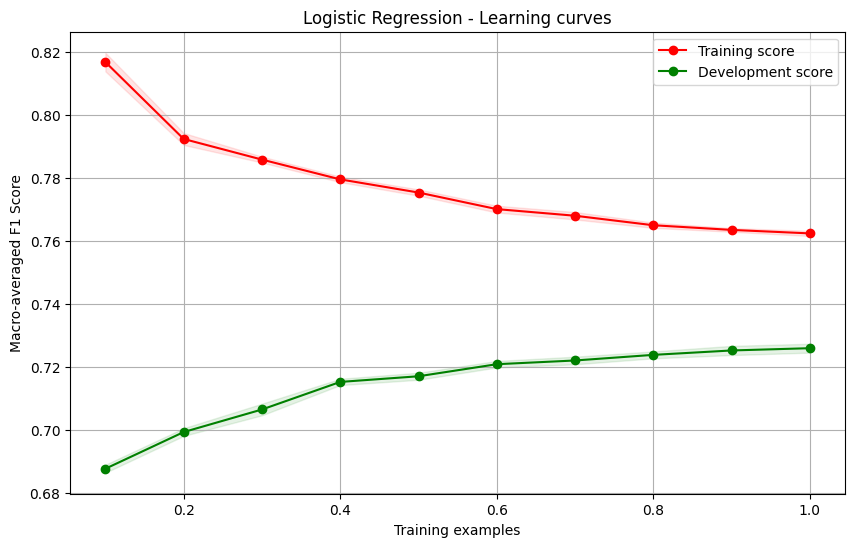

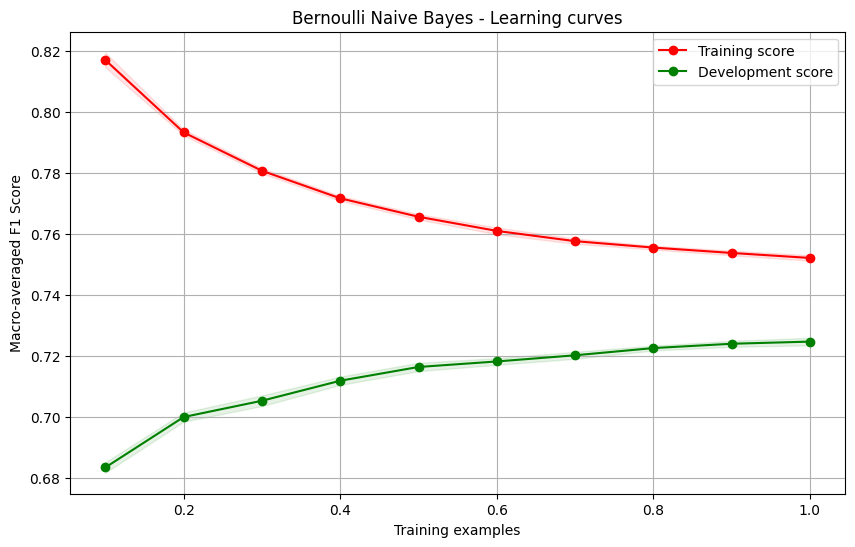

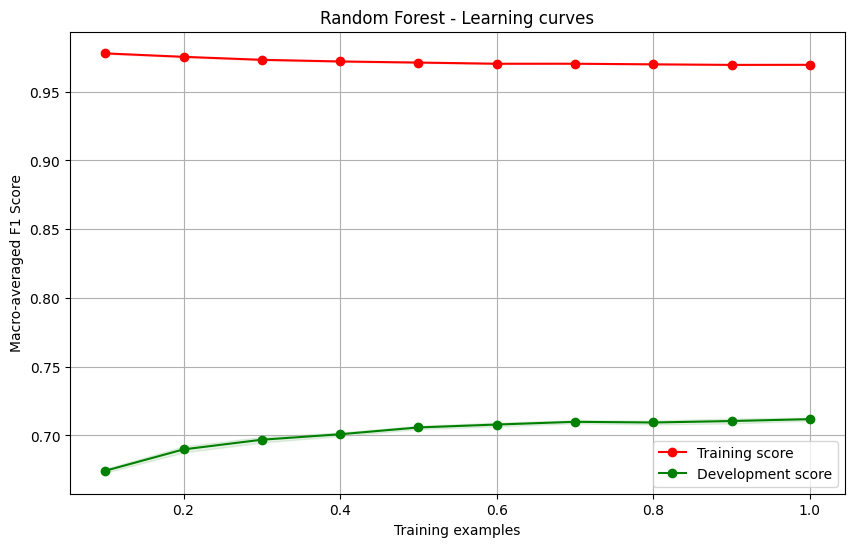

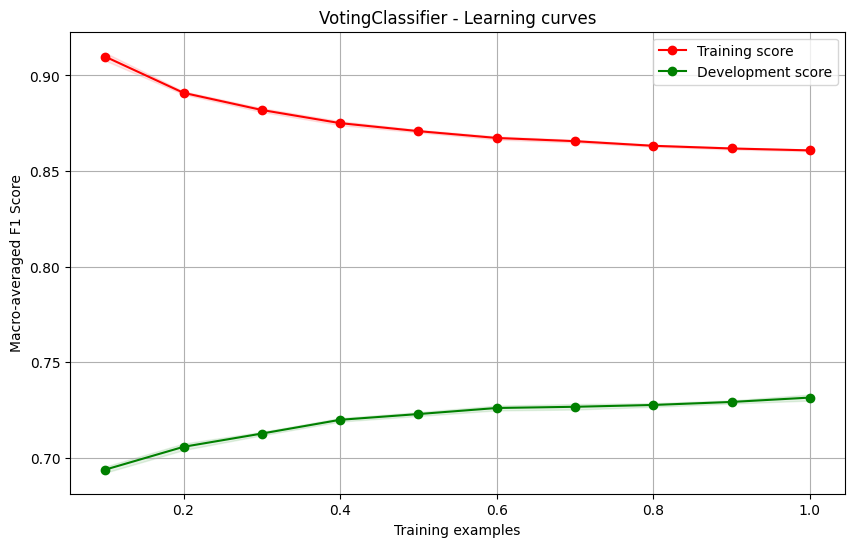

In [17]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

def generate_learning_curves(estimator, title, X_train, y_train, X_dev, y_dev, train_sizes=np.linspace(0.1, 1.0, 10)):
    train_scores = []
    dev_scores = []
    kf = KFold(n_splits=10, shuffle=True, random_state=50)

    for train_size in train_sizes:
        # Get train subset 
        subset_size = int(train_size * X_train.shape[0])
        X_subset, y_subset = X_train[:subset_size], y_train[:subset_size]
        kf = KFold(n_splits=10, shuffle=True, random_state=50)
        cv_train_scores = []
        cv_dev_scores = []
        
        for i, (train_index, test_data) in enumerate(kf.split(X_subset)):
            # Implement Cross Validation
            cv_X_train_subset = X_subset[train_index,:]
            cv_y_train_subset = y_subset.iloc[train_index]

            # Train the model on the subset
            estimator.fit(cv_X_train_subset, cv_y_train_subset)

            # Predictions on the subset
            y_train_pred = estimator.predict(cv_X_train_subset)
            cv_train_scores.append(f1_score(cv_y_train_subset, y_train_pred, average='macro'))

            # Predictions on the development set
            y_dev_pred = estimator.predict(X_dev)
            cv_dev_scores.append(f1_score(y_dev, y_dev_pred, average='macro'))
        
        train_scores.append(cv_train_scores)
        dev_scores.append(cv_dev_scores)

    #train_sizes, train_scores, dev_scores = generate_learning_curves(clf_logistic, X_train, train_data['Sentiment'], X_dev, dev_data['Sentiment'])
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    dev_scores_mean = np.mean(dev_scores, axis=1)
    dev_scores_std = np.std(dev_scores, axis=1)
    
    # Plot learning curves
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Macro-averaged F1 Score")
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.fill_between(train_sizes, dev_scores_mean - dev_scores_std, dev_scores_mean + dev_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, dev_scores_mean, 'o-', color="g", label="Development score")
    
    plt.grid()
    plt.legend(loc="best")
    plt.show()


# Plot learning curves for each classifier
classifiers = [
    (clf_logistic, "Logistic Regression"),
    (clf_bernoulli, "Bernoulli Naive Bayes"),
    (rf_model, "Random Forest"),
    (voting_clf, "VotingClassifier"),
]

for classifier, title in classifiers:
    generate_learning_curves(classifier, f"{title} - Learning curves", X_train, train_data['Sentiment'], X_dev, dev_data['Sentiment'])